In [1]:
import numpy as np
import pandas as pd
import pickle

from keras import models

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import to_categorical

# 1. Data
- Load data from pickle file
- split the data into independent and dependent
- split to train and test set

In [2]:
data = pickle.load(open('data_face_features_emotion.pickle',mode='rb'))

In [3]:
X = np.array(data['data']) # indendepent variable
y = np.array(data['label']) # dependent variable

In [4]:
X.shape

(5173, 22)

In [5]:
X = X.reshape(-1,22)
X.shape

(5173, 22)

In [6]:
# split the data into train and test
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4138, 22), (1035, 22), (4138,), (1035,))

# 2. Train Machine Learning

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix


### Logistic Regression

In [10]:
model_logistic = LogisticRegression(max_iter=175)
model_logistic.fit(x_train,y_train) # training logistic regression

LogisticRegression(max_iter=175)

In [11]:
def get_report(model, x_train,y_train,x_test,y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    
    
    # accuracy score
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_test = accuracy_score(y_test,y_pred_test)

    # f1 score
    f1_score_train = f1_score(y_train,y_pred_train,average='macro')
    f1_score_test = f1_score(y_test,y_pred_test,average='macro')
    
    columns = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprised']

    confm = confusion_matrix(y_test, y_pred_test)
    df_cm = DataFrame(confm, index=columns, columns=columns)

    ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)
    
    
    print('Accuracy Train = %0.2f'%acc_train)
    print('Accuracy Test = %0.2f'%acc_test)
    print('F1 Score Train = %0.2f'%f1_score_train)
    print('F1 Score Test = %0.2f'%f1_score_test)

Accuracy Train = 0.41
Accuracy Test = 0.38
F1 Score Train = 0.30
F1 Score Test = 0.29


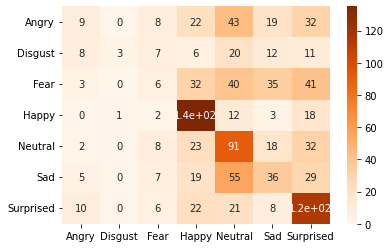

In [12]:
get_report(model_logistic,x_train,y_train,x_test,y_test)

### Support Vector Machines

In [40]:
model_svc = SVC(probability=True)
model_svc.fit(x_train,y_train)

SVC(probability=True)

Accuracy Train = 0.42
Accuracy Test = 0.40
F1 Score Train = 0.33
F1 Score Test = 0.31


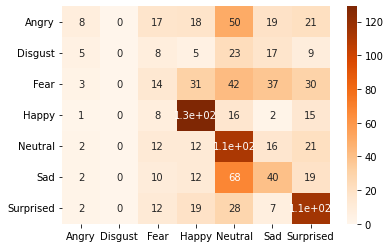

In [41]:
get_report(model_svc,x_train,y_train,x_test,y_test)

### Random Forest

In [37]:
model_rf = RandomForestClassifier(n_estimators=10,)
model_rf.fit(x_train,y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

Accuracy Train = 0.99
Accuracy Test = 0.59
F1 Score Train = 0.99
F1 Score Test = 0.59


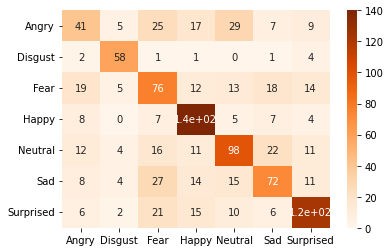

In [18]:
get_report(model_rf,x_train,y_train,x_test,y_test)

## Voting Classifier

In [49]:
model_voting = VotingClassifier(estimators=[
    ('logistic',LogisticRegression(max_iter=175)),
    ('svm',SVC(probability=True)),
    ('rf',RandomForestClassifier())
], voting='hard',weights=[1,1,5])

In [50]:
model_voting.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=175)),
                             ('svm', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 voting='soft', weights=[1, 1, 5])

Accuracy Train = 1.00
Accuracy Test = 0.63
F1 Score Train = 1.00
F1 Score Test = 0.62


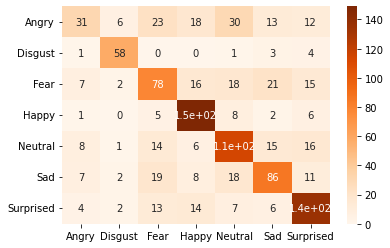

In [48]:
get_report(model_voting,x_train,y_train,x_test,y_test)

# 3. Parameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

In [31]:
model_grid = GridSearchCV(model_voting,
                         param_grid={
                             'svm__C':[3,5,7,10],
                             'svm__gamma':[0.1,0.3,0.5],
                             'rf__n_estimators':[5,10,20],
                             'rf__max_depth':[3,5,7],
                             'voting':['soft','hard']
                         },scoring='accuracy',cv=3,n_jobs=1,verbose=2)

In [32]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=soft; total time=   2.3s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=soft; total time=   2.3s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=soft; total time=   2.2s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=hard; total time=   2.3s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=hard; total time=   2.3s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=hard; total time=   2.3s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.3, voting=soft; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.3, voting=soft; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.3, voting=soft; total time=   2.1s
[

[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=soft; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=soft; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=soft; total time=   2.2s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=hard; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=hard; total time=   2.2s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=hard; total time=   2.2s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.5, voting=soft; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.5, voting=soft; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.5, voting=soft; total time=   2.1s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3

[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=soft; total time=   2.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=soft; total time=   2.7s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=soft; total time=   2.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=hard; total time=   2.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=hard; total time=   2.7s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=hard; total time=   2.9s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5, svm__gamma=0.1, voting=soft; total time=   3.1s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5, svm__gamma=0.1, voting=soft; total time=   3.0s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5, svm__gamma=0.1, voting=soft; total time=   2.7s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5

[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=soft; total time=   2.6s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=soft; total time=   2.4s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=hard; total time=   2.4s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=hard; total time=   2.4s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=soft; total time=   2.2s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=soft; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=soft; total time=   2.2s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=hard; total time=   2.2s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gam

[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=soft; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=hard; total time=   2.4s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=soft; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=soft; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=soft; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5

[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=soft; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=soft; total time=   2.4s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=soft; total time=   2.5s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=soft; total time=   2.5s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=hard; total time=   2.5s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=hard; total time=   2.5s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7

[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.1, voting=hard; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.1, voting=hard; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.1, voting=hard; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=soft; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=soft; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=soft; total time=   2.2s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=hard; total time=   2.2s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gam

[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.3, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.3, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=soft; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=soft; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=soft; total time=   2.2s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=10, svm__gamma=0.1, voting=soft; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=

[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=7, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=7, svm__gamma=0.5, voting=hard; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=soft; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=soft; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=soft; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=hard; total time=   2.5s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=hard; total time=   2.5s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=hard; total time=   2.4s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.3, voting=soft; total time=   2.3s
[CV] END rf__max_depth=7, rf__n_estimators=20, s

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('logistic',
                                                     LogisticRegression(max_iter=175)),
                                                    ('svm',
                                                     SVC(probability=True)),
                                                    ('rf',
                                                     RandomForestClassifier())],
                                        voting='soft', weights=[1, 1, 5]),
             n_jobs=1,
             param_grid={'rf__max_depth': [3, 5, 7],
                         'rf__n_estimators': [5, 10, 20],
                         'svm__C': [3, 5, 7, 10], 'svm__gamma': [0.1, 0.3, 0.5],
                         'voting': ['soft', 'hard']},
             scoring='accuracy', verbose=2)

In [33]:
model_best_estimator = model_grid.best_estimator_

In [34]:
model_grid.best_score_

0.4644752376047896

Accuracy Train = 0.62
Accuracy Test = 0.45
F1 Score Train = 0.59
F1 Score Test = 0.41


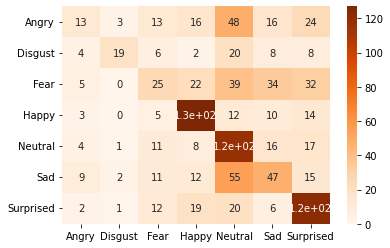

In [35]:
get_report(model_grid,x_train,y_train,x_test,y_test)

# 4. Save Model

In [38]:
pickle.dump(model_rf,open('./models/machinelearning_face_emotion.pkl',mode='wb'))